Next, let's look at something that actually goes about and implements `bokeh` (and does a bunch of other things besides): `holoviews`. `holoviews` is a high-level plotting library designed for evil geniuses which takes all of the innovations in the current Python plotting stack and turns them all up to 11.

It also has JS in it, so we have to enable it first.

In [2]:
import holoviews as hv
hv.notebook_extension()

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Here's our `meat` scatter plot again:

In [1]:
from ggplot import meat

In [3]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


b':Scatter   [x]   (y)'
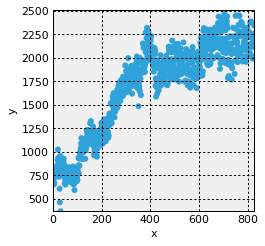

In [5]:
df = meat['beef']

hv.Scatter(df)

`holoviews` has a grammar of graphic syntax for plot composition. It's implemented differently from `ggpy`, though. The `+` is used for faceting:

:Layout
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)
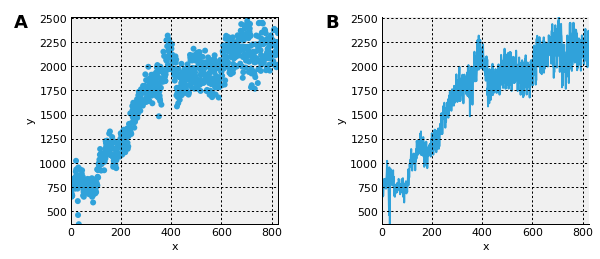

In [6]:
hv.Scatter(df) + hv.Curve(df)

While a `*` is used for composing:

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)
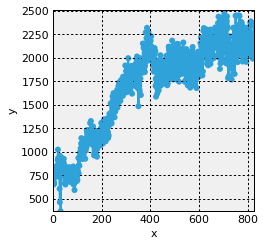

In [7]:
hv.Scatter(df) * hv.Curve(df)

This is great because it takes better advantage of the syntax we have available to us for composing the charts. Having a single operator, as in `ggpy`, makes faceting feel like a separate operation from everything else, because it's the only one that requires a lot of tuning...

Using another operator for this *feels* right, and I think it's a great API decision.

Another interesting API feature is the fact that we can use function chaining to set style options:

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)
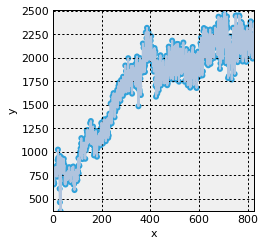

In [10]:
hv.Scatter(df) * hv.Curve(df)(style={'color': 'lightsteelblue'})

However, for this you'll probably want to instead use an interesting feature of `holoviews` that none of the other libraries we've seen so far have taken advantage of: line magic!

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)
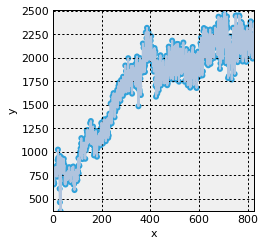

In [11]:
%opts Curve style(color='lightsteelblue')

hv.Scatter(df) * hv.Curve(df)

If you've never seen them before, magics are shebangs provided in the Jupyter notebook environment which can used to modify the code you run in the cell that follows. That's a lot of extensibility that you can take advantage of. 

Magics are really powerful because they have access to all of the code that comes after them in the cell. They range from relatively simple things, like a cross-platform `%ls` function...

In [12]:
%ls

01-pandas.ipynb      07-plotly.ipynb     dev.ipynb
02-seaborn.ipynb     08-bokeh.ipynb      holoviews-screwball-1.ipynb
03-matplotlib.ipynb  09-holoviews.ipynb  holoviews-screwball-2.ipynb
04-ggplot.ipynb      10-bqplot.ipynb     Top 20 Zip Codes Bar Chart.ipynb
05-pygal.ipynb       11-altair.ipynb
06-mpld3.ipynb       Bar Chart.ipynb


...to more complicated things like watermarking:

In [15]:
%load_ext watermark

%watermark

2017-02-20T22:42:45-05:00

CPython 3.6.0
IPython 5.2.2

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.8.0-36-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


You can even use it to embed entire other languages in your environment, if you're clever about it.

I'm sure there are others, but `holoviews` is the only library I'm personally aware of that uses magics aggressively as part of its own API. That's another interesting innovation that this library implements that's really worth exploring.

...continue...